[![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58239303-lesson-8-deployment)

# Deployment

## Review 

We built up to an agent with memory: 

* `act` - let the model call specific tools 
* `observe` - pass the tool output back to the model 
* `reason` - let the model reason about the tool output to decide what to do next (e.g., call another tool or just respond directly)
* `persist state` - use an in memory checkpointer to support long-running conversations with interruptions

## Goals

Now, we'll cover how to actually deploy our agent locally to Studio and to `LangGraph Platform`.

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langgraph_sdk langchain_core

## Concepts

There are a few central concepts to understand -

`LangGraph` —
- Python and JavaScript library 
- Allows creation of agent workflows 

`LangGraph API` —
- Bundles the graph code 
- Provides a task queue for managing asynchronous operations
- Offers persistence for maintaining state across interactions

`LangGraph Platform` --
- Hosted service for the LangGraph API
- Allows deployment of graphs from GitHub repositories
- Also provides monitoring and tracing for deployed graphs
- Accessible via a unique URL for each deployment

`LangGraph Studio` --
- Integrated Development Environment (IDE) for LangGraph applications
- Uses the API as its back-end, allowing real-time testing and exploration of graphs
- Can be run locally or with cloud-deployment

`LangGraph SDK` --
- Python library for programmatically interacting with LangGraph graphs
- Provides a consistent interface for working with graphs, whether served locally or in the cloud
- Allows creation of clients, access to assistants, thread management, and execution of runs

## Testing Locally
<div style="display: flex; justify-content: center;">
  <div style="
      box-shadow: 8px 8px 15px rgba(0,0,0,0.3);
      border-radius: 8px;
      overflow: hidden;
      display: inline-block;
  ">
    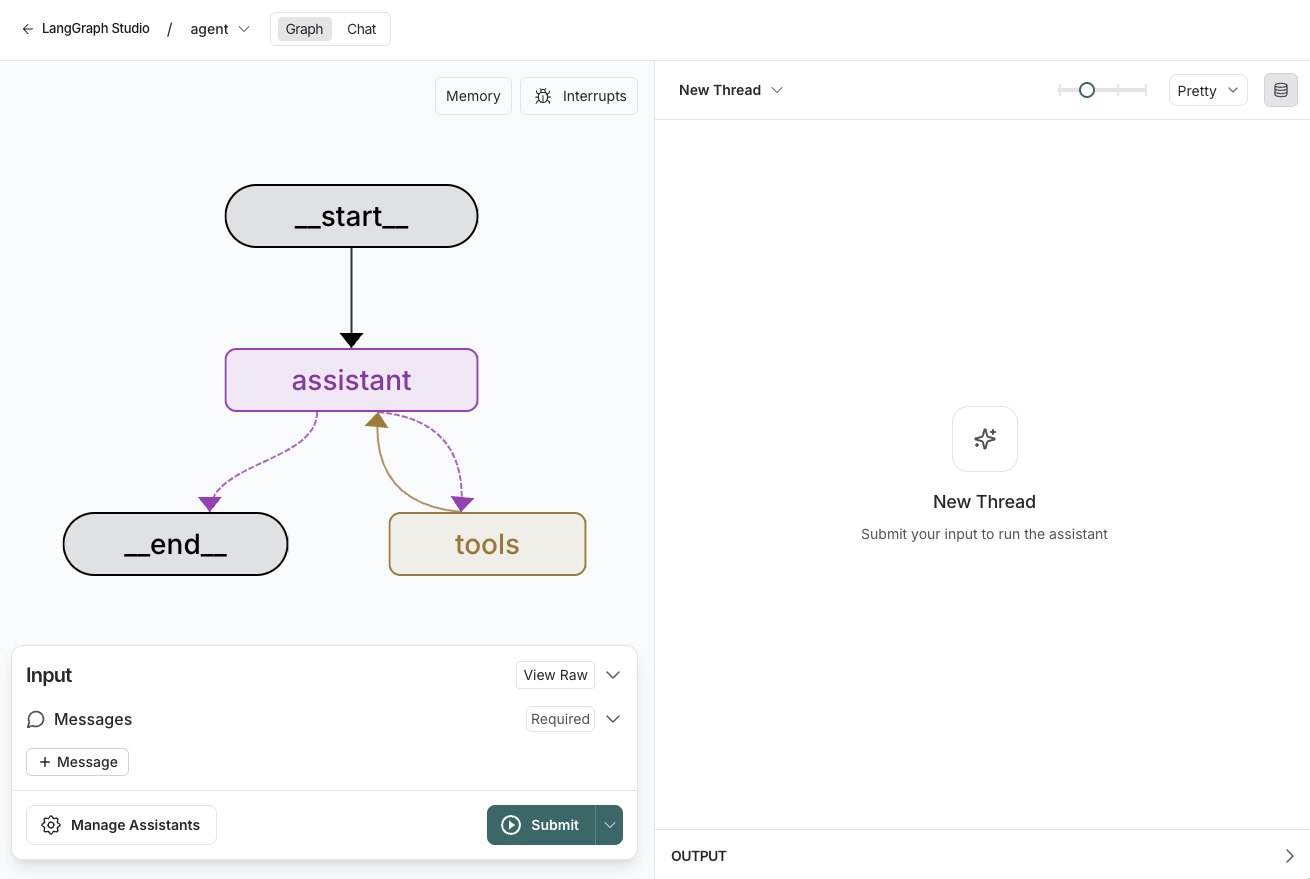
  </div>
</div>



See documentation [here](https://langchain-ai.github.io/langgraph/concepts/langgraph_studio/#local-development-server) on the local development server and [here](https://langchain-ai.github.io/langgraph/how-tos/local-studio/#run-the-development-server). To start the local development server, run the following command in your terminal in the `/studio` directory in this module:

```
langgraph dev
```

You should see the following output:
```
- 🚀 API: http://127.0.0.1:2024
- 🎨 Studio UI: https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024
- 📚 API Docs: http://127.0.0.1:2024/docs
```

Open your browser and navigate to the Studio UI: `https://smith.langchain.com/studio/?baseUrl=http://127.0.0.1:2024`.

In [ ]:
if 'google.colab' in str(get_ipython()):
    raise Exception("Unfortunately LangGraph Studio is currently not supported on Google Colab")

In [ ]:
from langgraph_sdk import get_client

In [ ]:
# This is the URL of the local development server
URL = "http://127.0.0.1:2024"
client = get_client(url=URL)

# Search all hosted graphs
assistants = await client.assistants.search()
assistants

In [ ]:
assistants[-3]

In [ ]:
# We create a thread for tracking the state of our run
thread = await client.threads.create()

Now, we can run our agent [with `client.runs.stream`](https://langchain-ai.github.io/langgraph/concepts/low_level/#stream-and-astream) with:

* The `thread_id`
* The `graph_id`
* The `input` 
* The `stream_mode`

We'll discuss streaming in depth in a future module. 

For now, just recognize that we are [streaming](https://langchain-ai.github.io/langgraph/cloud/how-tos/stream_values/) the full value of the state after each step of the graph with `stream_mode="values"`.
 
The state is captured in the `chunk.data`. 

In [ ]:
from langchain_core.messages import HumanMessage

# Input
input = {"messages": [HumanMessage(content="Multiply 3 by 2.")]}
 
# Stream
async for chunk in client.runs.stream(
        thread['thread_id'],
        "agent", 
        input=input,
        stream_mode="values",
    ):
    if chunk.data and chunk.event != "metadata":
        print(chunk.data['messages'][-1])

## Testing with Cloud

We can deploy to Cloud via LangSmith, as outlined [here](https://langchain-ai.github.io/langgraph/cloud/quick_start/#deploy-from-github-with-langgraph-cloud). 

### Create a New Repository on GitHub

* Go to your GitHub account
* Click on the "+" icon in the upper-right corner and select `"New repository"`
* Name your repository (e.g., `langchain-academy`)

### Add Your GitHub Repository as a Remote

* Go back to your terminal where you cloned `langchain-academy` at the start of this course
* Add your newly created GitHub repository as a remote

```
git remote set-url origin https://github.com/your-username/langchain-academy.git
```
* Push to it
```
git push -u origin main
```

### Connect LangSmith to your GitHub Repository and Create Deployment

* Go to [LangSmith](hhttps://smith.langchain.com/)
* Click on `deployments` tab on the left LangSmith panel
* Add `+ New Deployment`
* Then, select the Github repository (e.g., `langchain-academy`) that you just created for the course
* Name the deployment - "Langchain Academy Deployment", for example
* Point the `LangGraph API config file` at one of the `studio` directories
    * For example, for module-1 use: `module-1/studio/langgraph.json`
* Click the '+ Add' to set your API keys (e.g., you can just copy from your `module-1/studio/.env` file)
* Here is a [video](https://www.youtube.com/watch?v=YWVuBLSbNWE) that goes over these steps in more detail if needed. 
 
<div style="display: flex; justify-content: center;">
  <div style="
      box-shadow: 8px 8px 15px rgba(0,0,0,0.3);
      border-radius: 8px;
      overflow: hidden;
      display: inline-block;
  ">
    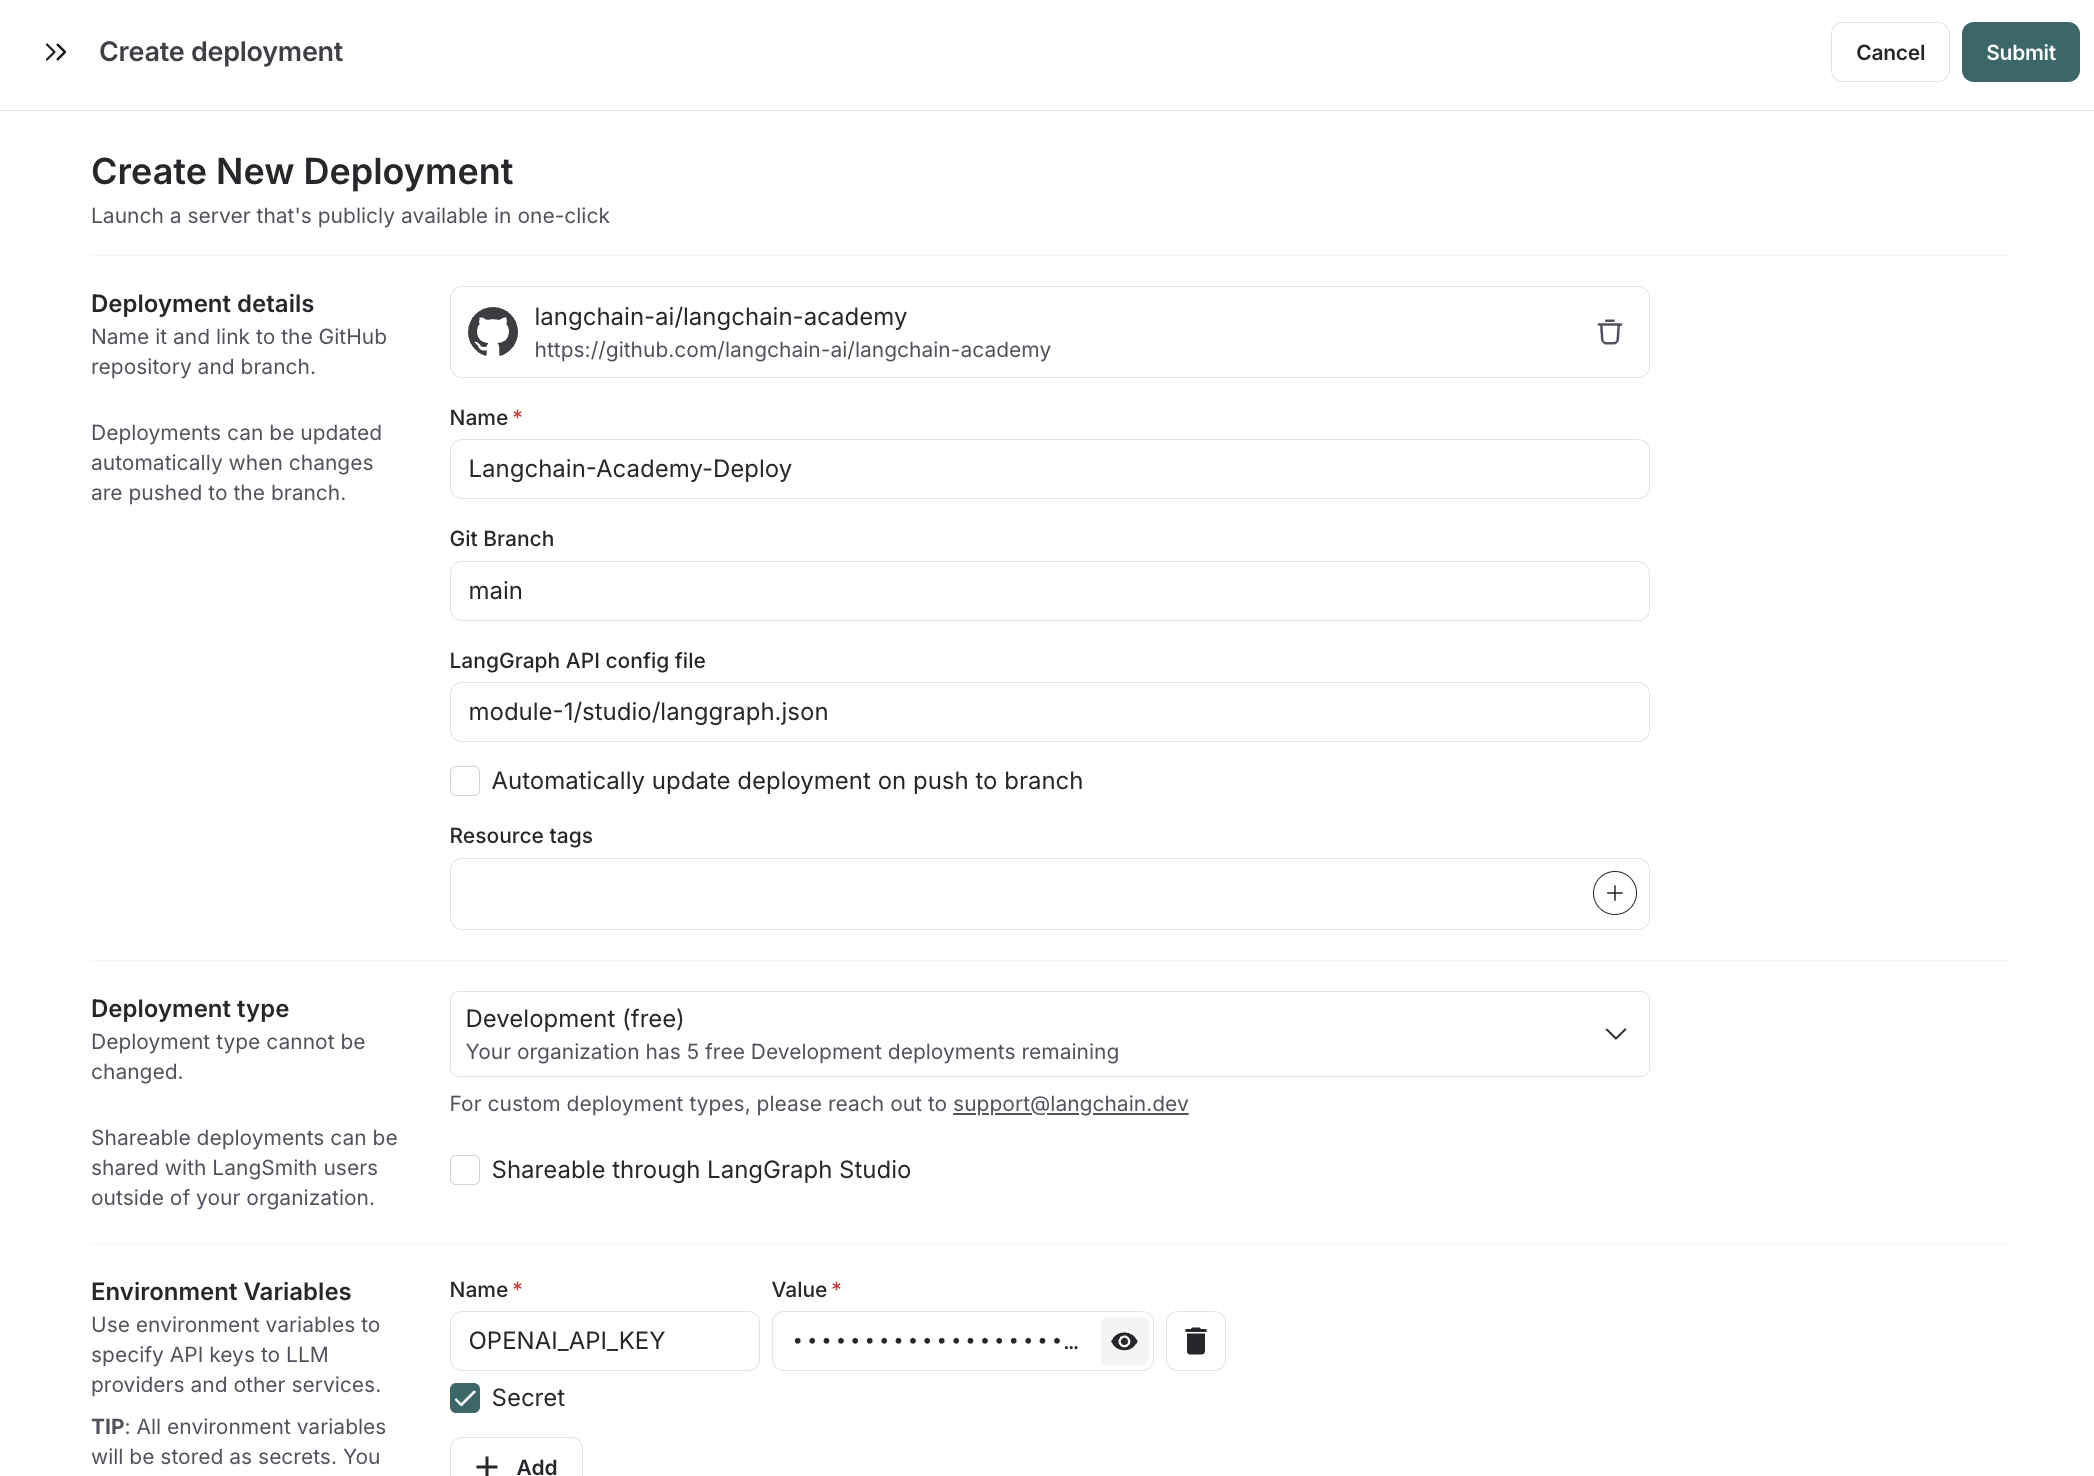
  </div>
</div>

<!-- 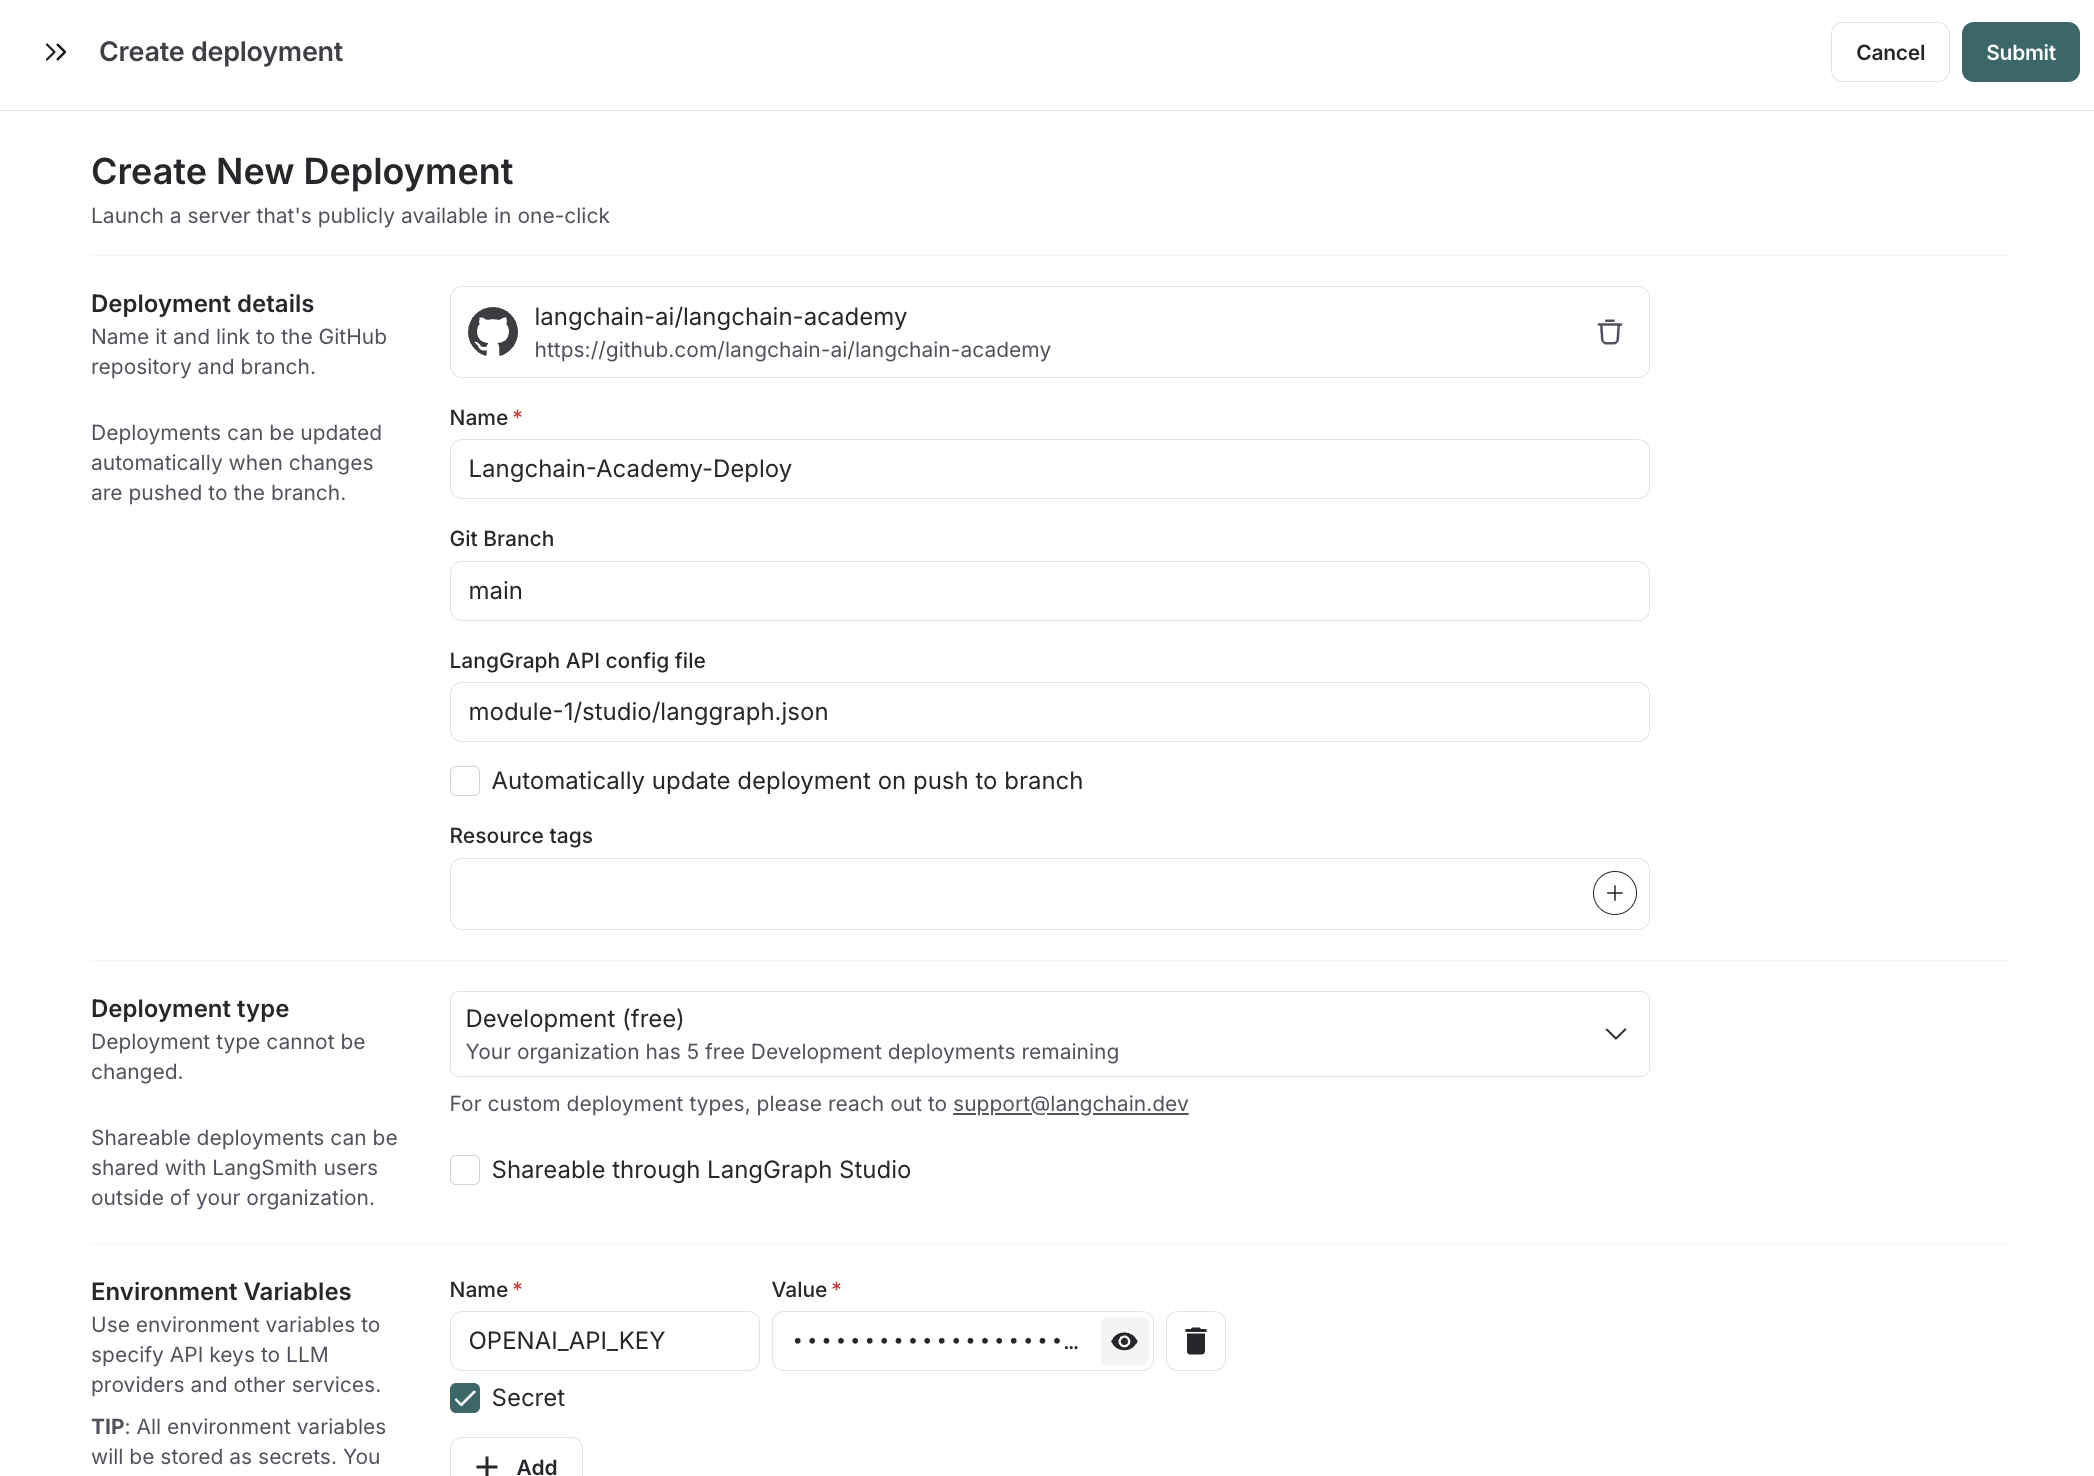 -->

<!--![Screenshot 2024-09-03 at 11.35.12 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbad4fd61c93d48e5d0f47_deployment2.png) -->

### Work with your deployment

We can then interact with our deployment a few different ways:

* With the [SDK](https://langchain-ai.github.io/langgraph/cloud/quick_start/#use-with-the-sdk), as before.
* With [LangGraph Studio](https://langchain-ai.github.io/langgraph/cloud/quick_start/#interact-with-your-deployment-via-langgraph-studio).

<div style="display: flex; justify-content: center;">
  <div style="
      box-shadow: 8px 8px 15px rgba(0,0,0,0.3);
      border-radius: 8px;
      overflow: hidden;
      display: inline-block;
  ">
    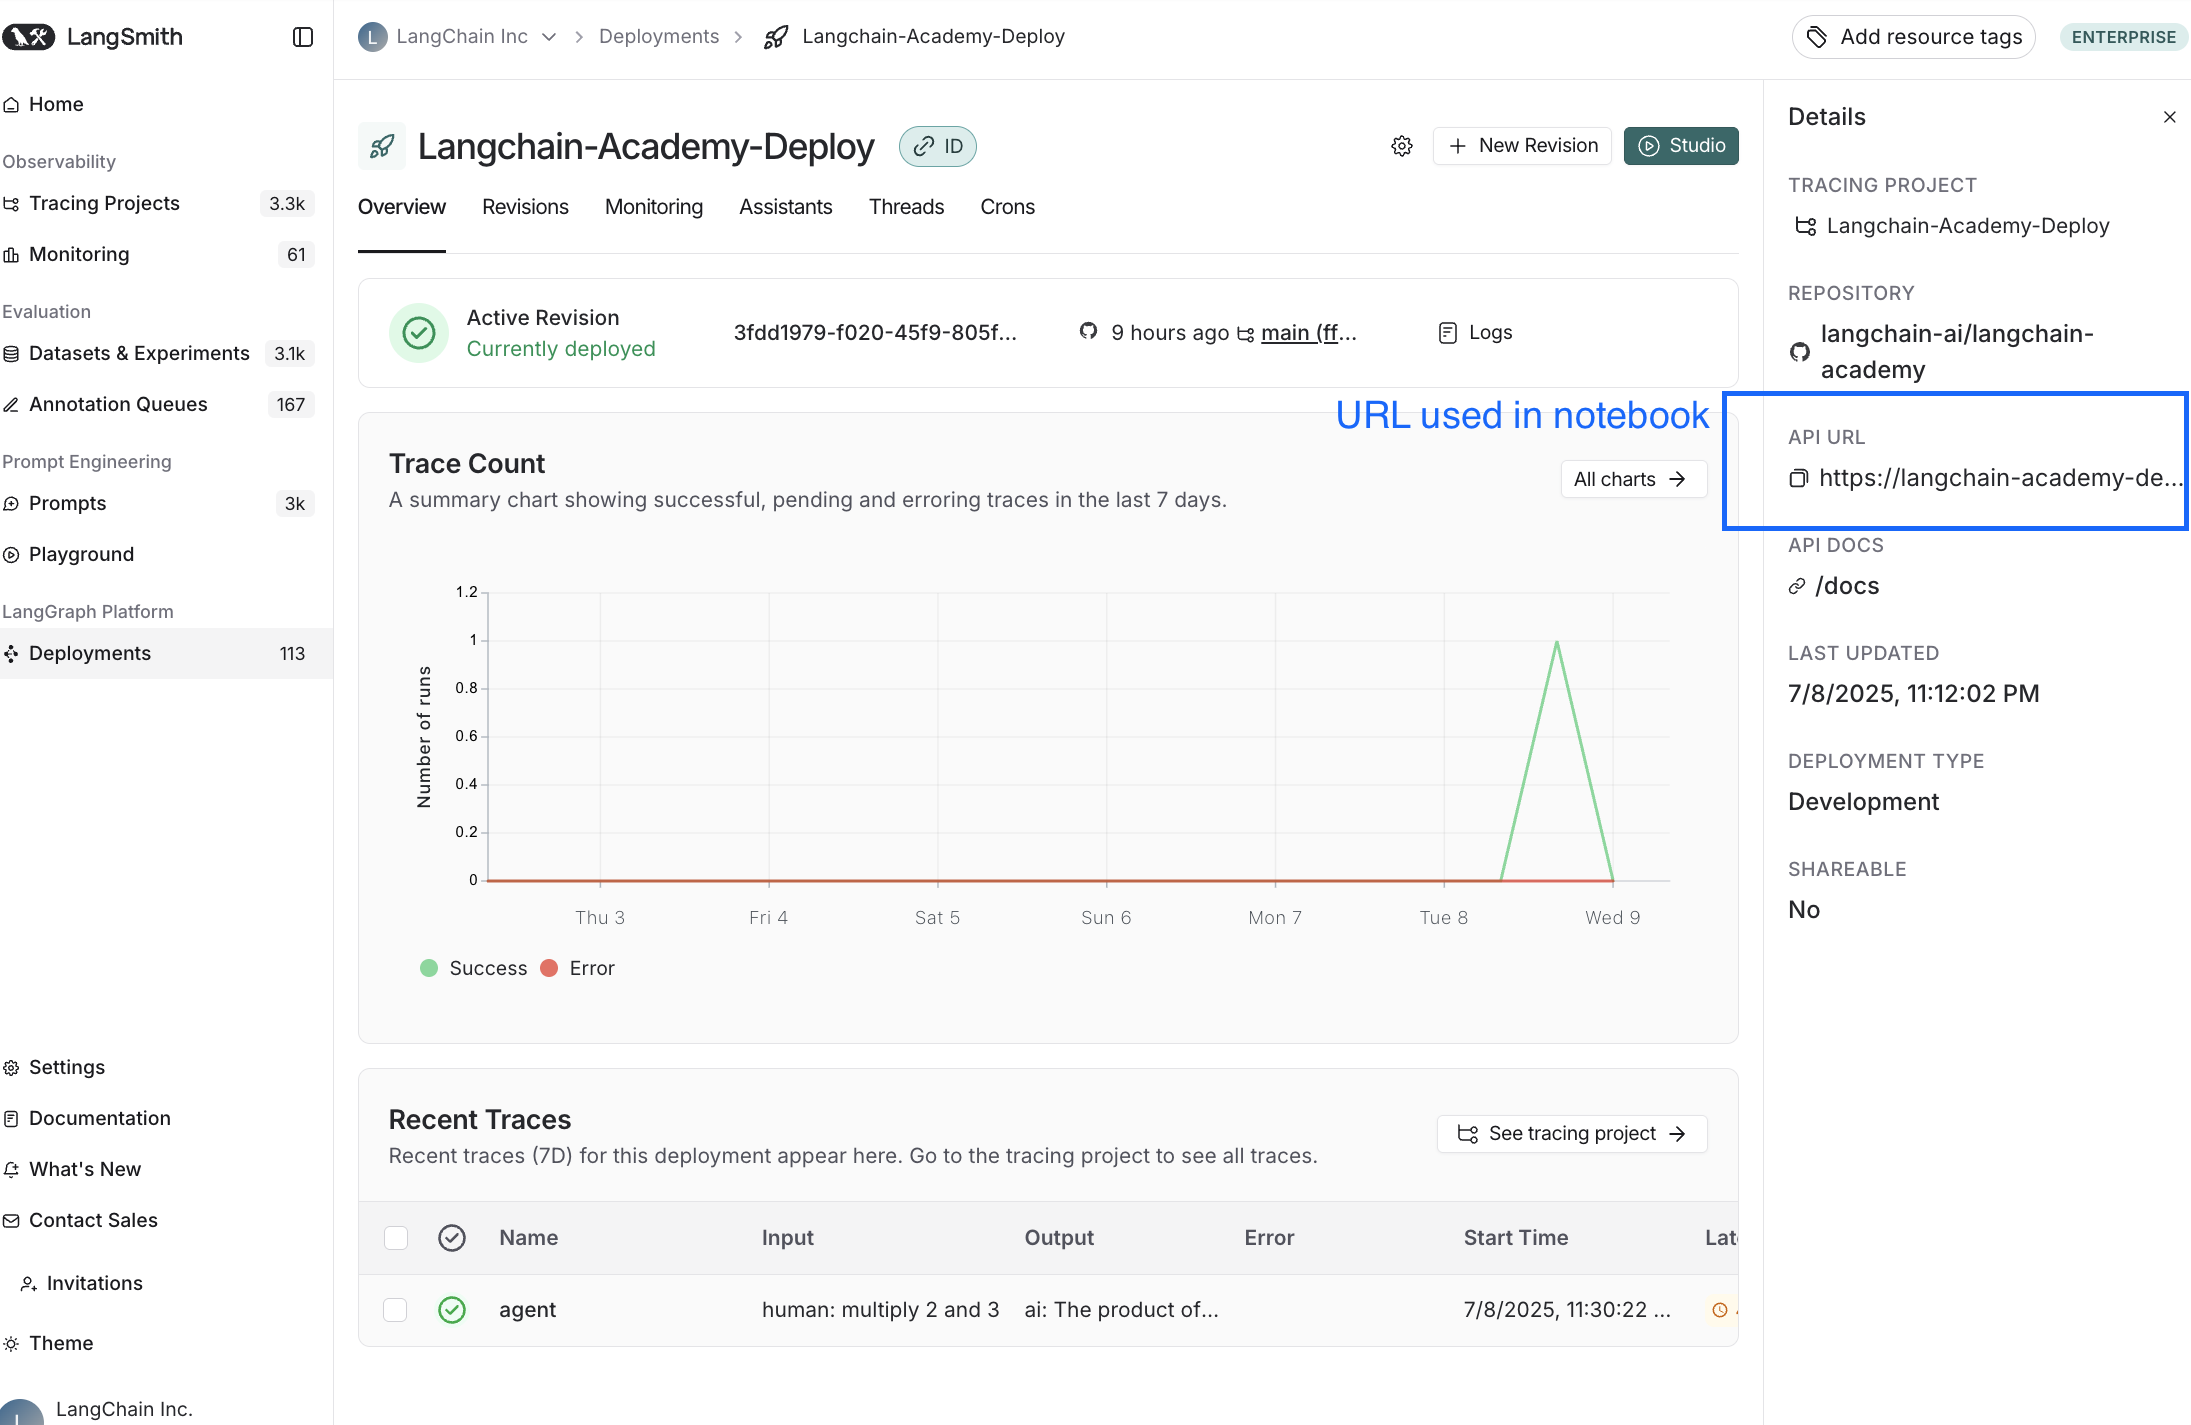
  </div>
</div>

<!-- ![Screenshot 2024-08-23 at 10.59.36 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbad4fa159a09a51d601de_deployment3.png) -->

To use the SDK here in the notebook, simply ensure that `LANGSMITH_API_KEY` is set!

In [ ]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("LANGSMITH_API_KEY")

In [ ]:
# Replace this with the URL of your deployed graph
URL = "https://langchain-academy-deploy-f0c7cd410bf8553488f50ba8b7c98615.us.langgraph.app"
client = get_client(url=URL)

# Search all hosted graphs
assistants = await client.assistants.search()
assistants

In [ ]:
# Select the agent
agent = assistants[0]

In [ ]:
agent

In [ ]:
# We create a thread for tracking the state of our run
thread = await client.threads.create()

In [ ]:
from langchain_core.messages import HumanMessage

# Input
input = {"messages": [HumanMessage(content="Multiply 3 by 2.")]}

# Stream
async for chunk in client.runs.stream(
        thread['thread_id'],
        "agent",
        input=input,
        stream_mode="values",
    ):
    if chunk.data and chunk.event != "metadata":
        print(chunk.data['messages'][-1])